<a href="https://colab.research.google.com/github/SHAIMA-HAQUE/Decision-Tree-Classifier---GRIP/blob/main/Decision_Tree_Classifier_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shaima Haque**

# **GRIP - SPARKS FOUNDATION**


# **Data Scientist and Business Analytics Intern**



**TASK 6 :Prediction using Decision Tree Algorithm
(Level - Intermediate)**

**Problem Statement:**

- Create the Decision Tree classifier for the dataset and visualize it graphically.
-The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# **Import Libraries**

In [34]:
import numpy as np
import pandas as pd


In [35]:
dataset = pd.read_csv("Iris.csv")
print(dataset)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [36]:
dataset['Species'] = dataset['Species'].astype('category')
dataset['Encoded_Species'] = dataset['Species'].cat.codes
print(dataset)

      Id  SepalLengthCm  ...         Species  Encoded_Species
0      1            5.1  ...     Iris-setosa                0
1      2            4.9  ...     Iris-setosa                0
2      3            4.7  ...     Iris-setosa                0
3      4            4.6  ...     Iris-setosa                0
4      5            5.0  ...     Iris-setosa                0
..   ...            ...  ...             ...              ...
145  146            6.7  ...  Iris-virginica                2
146  147            6.3  ...  Iris-virginica                2
147  148            6.5  ...  Iris-virginica                2
148  149            6.2  ...  Iris-virginica                2
149  150            5.9  ...  Iris-virginica                2

[150 rows x 7 columns]


In [37]:
X = dataset.iloc[:,0:4].values
Y = dataset.iloc[:,-1].values

In [38]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


# **Splitting Dataset**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
print(X_train.shape, X_test.shape)

(105, 4) (45, 4)


In [40]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train, Y_train)

Y_pred = logReg.predict(X_test)
print(Y_test, Y_pred)

[0 1 0 2 0 0 2 2 0 2 1 1 1 2 0 1 1 2 2 2 0 0 2 1 2 1 1 2 0 2 0 0 2 0 2 2 2
 1 2 2 2 2 0 2 1] [0 1 0 2 0 0 2 2 0 2 1 1 1 2 0 1 1 2 2 2 0 0 2 1 2 1 1 2 0 2 0 0 2 0 2 2 2
 1 2 2 2 2 0 2 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
from sklearn.metrics import  confusion_matrix, accuracy_score, precision_score, recall_score

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy:\n", accuracy_score(Y_test, Y_pred)) 
print("Precision:\n", precision_score(Y_test, Y_pred, average=None))
print("Recall:\n", recall_score(Y_test, Y_pred, average = None))

Confusion Matrix:
 [[13  0  0]
 [ 0 11  0]
 [ 0  0 21]]
Accuracy:
 1.0
Precision:
 [1. 1. 1.]
Recall:
 [1. 1. 1.]


# **Implementing Decision Tree Classifier**

In [42]:

from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred_dtc = dtc.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_dtc))
print("Accuracy:\n", accuracy_score(Y_test, Y_pred_dtc)) 

Confusion Matrix:
 [[13  0  0]
 [ 0 11  0]
 [ 0  0 21]]
Accuracy:
 1.0


# **Visualizing Data**

In [43]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


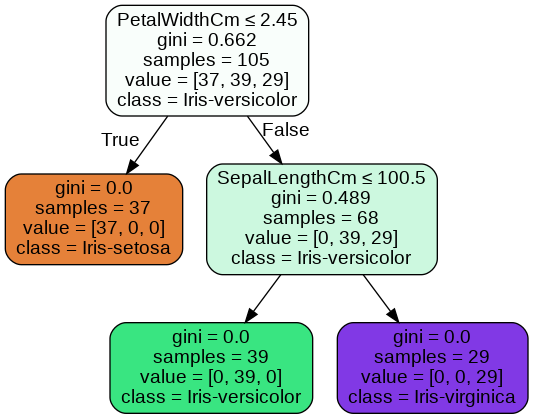

In [44]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())

# **Predict Dataset**

In [45]:
dtc.predict([[5,3.4,1.5,0.2]])

array([0], dtype=int8)